<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/miky_secondoEsperimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sort = 'Random'

# file con i dati di tutti i ristoranti random
all_analysis = '1n9vdCnppJGdE6M6HdKYlksuTntQYHA7P'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': all_analysis})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

# leggo il csv con pandas
res = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')


In [48]:
import warnings
import numpy as np

# elimino dal dataframe le righe che non sono state riconosciute e presentano questa scritta
res = res[((res.age != 'Not recognized'))]

# sopprimo il Future Warning
warnings.simplefilter(action='ignore', category=FutureWarning)

# converto le stringhe di age in int
res.age = pd.to_numeric(res.age, errors='coerce').fillna(0).astype(np.int64)


# df con le età minori di 40
res_u40 = res[(res['age'] < 40)]
# df con le età maggiori di 40
res_o40 = res[(res['age'] > 40)]

# df con le donne di età minore di 40
women_u40 = (res_u40['gender'] == 'feminine')
# df con le donne di età maggiore di 40
women_o40 = (res_o40['gender'] == 'feminine')
# df con gli uomini di età minore di 40
men_u40 = (res_u40['gender'] == 'masculine')
# df con gli uomini di età maggiore di 40
men_o40 = (res_o40['gender'] == 'masculine')

asian = res['ethnicity'] == 'asian'
mexican = res['ethnicity'] == 'hispanic, latino, or spanish origin'
black_american = res['ethnicity'] == 'black or african american'
white_american = res['ethnicity'] == 'white'
positive = res['review_sentiment'] == 'positive'
negative = res['review_sentiment'] == 'negative'
neutral = res['review_sentiment'] == 'neutral'

In [51]:
# Prendo i dati utili dei ristoranti americani

# AMERICAN

# totale recensioni positive nei ristoranti americani
totaleTupelo_positive = len(res[((res['restaurant'] == 'TupeloHoney') & (positive))])
totaleCravings_positive = len(res[((res['restaurant'] == 'CravingsBuffet') & (positive))])
totaleCulinary_positive = len(res[((res['restaurant'] == 'CulinaryDropout') & (positive))])

# totale recensioni negative nei ristoranti americani
totaleTupelo_negative = len(res[((res['restaurant'] == 'TupeloHoney') & (negative))])
totaleCravings_negative = len(res[((res['restaurant'] == 'CravingsBuffet') & (negative))])
totaleCulinary_negative = len(res[((res['restaurant'] == 'CulinaryDropout') & (negative))])

# totale recensioni neutre nei ristoranti americani
totaleTupelo_neutral = len(res[((res['restaurant'] == 'TupeloHoney') & (neutral))])
totaleCravings_neutral = len(res[((res['restaurant'] == 'CravingsBuffet') & (neutral))])
totaleCulinary_neutral = len(res[((res['restaurant'] == 'CulinaryDropout') & (neutral))])


# totale complessivo delle recensioni degli utenti nei ristoranti americani
totPositiveAmericanRestaurants = totaleTupelo_positive + totaleCravings_positive + totaleCulinary_positive
totNegativeAmericanRestaurants = totaleTupelo_negative + totaleCravings_negative + totaleCulinary_negative
totNeutralAmericanRestaurants = totaleTupelo_neutral + totaleCravings_neutral + totaleCulinary_neutral


restaurant_typology = 'American'
typology = len(res[(res['typology'] == '%s' % restaurant_typology)])

# POSITIVI
# numero medio di donne e uomini al di sopra e al di sotto dei 40 annni sul totale degli utenti per tipologia di ristorante
women_u40_american_positive = (len(res[(res['typology'] == '%s' % restaurant_typology) & (women_u40) & (positive)]) * 100) / totPositiveAmericanRestaurants
women_o40_american_positive = (len(res[(res['typology'] == '%s' % restaurant_typology) & (women_o40) & (positive)]) * 100) / totPositiveAmericanRestaurants
men_u40_american_positive = (len(res[(res['typology'] == '%s' % restaurant_typology) & (men_u40) & (positive)]) * 100) / totPositiveAmericanRestaurants
men_o40_american_positive = (len(res[(res['typology'] == '%s' % restaurant_typology) & (men_o40) & (positive)]) * 100) / totPositiveAmericanRestaurants


# NEGATIVI
# numero medio di donne e uomini al di sopra e al di sotto dei 40 annni sul totale degli utenti per tipologia di ristorante e per polarità
women_u40_american_negative = (len(res[(res['typology'] == '%s' % restaurant_typology) & (women_u40) & (negative)]) * 100) / totNegativeAmericanRestaurants
women_o40_american_negative = (len(res[(res['typology'] == '%s' % restaurant_typology) & (women_o40) & (negative)]) * 100) / totNegativeAmericanRestaurants
men_u40_american_negative = (len(res[(res['typology'] == '%s' % restaurant_typology) & (men_u40) & (negative)]) * 100) / totNegativeAmericanRestaurants
men_o40_american_negative = (len(res[(res['typology'] == '%s' % restaurant_typology) & (men_o40) & (negative)]) * 100) / totNegativeAmericanRestaurants


# NEUTRI
# numero medio di donne e uomini al di sopra e al di sotto dei 40 annni sul totale degli utenti per tipologia di ristorante e per polarità
women_u40_american_neutral = (len(res[(res['typology'] == '%s' % restaurant_typology) & (women_u40) & (neutral)]) * 100) / totNeutralAmericanRestaurants
women_o40_american_neutral = (len(res[(res['typology'] == '%s' % restaurant_typology) & (women_o40) & (neutral)]) * 100) / totNeutralAmericanRestaurants
men_u40_american_neutral = (len(res[(res['typology'] == '%s' % restaurant_typology) & (men_u40) & (neutral)]) * 100) / totNeutralAmericanRestaurants
men_o40_american_neutral = (len(res[(res['typology'] == '%s' % restaurant_typology) & (men_o40) & (neutral)]) * 100) / totNeutralAmericanRestaurants


In [57]:
# Prendo i dati utili dei ristoranti asiatici

# ASIATICI

# totale recensioni positive nei ristoranti asiatici
totaleFuto_positive = len(res[((res['restaurant'] == 'FutoButa') & (positive))])
totaleIchiza_positive = len(res[((res['restaurant'] == 'Ichiza') & (positive))])
totaleHarumi_positive = len(res[((res['restaurant'] == 'HarumiSushi') & (positive))])

# totale recensioni negative nei ristoranti asiatici
totaleFuto_negative = len(res[((res['restaurant'] == 'FutoButa') & (negative))])
totaleIchiza_negative = len(res[((res['restaurant'] == 'Ichiza') & (negative))])
totaleHarumi_negative = len(res[((res['restaurant'] == 'HarumiSushi') & (negative))])

# totale recensioni neutre nei ristoranti asiatici
totaleFuto_neutral = len(res[((res['restaurant'] == 'FutoButa') & (neutral))])
totaleIchiza_neutral = len(res[((res['restaurant'] == 'Ichiza') & (neutral))])
totaleHarumi_neutral = len(res[((res['restaurant'] == 'HarumiSushi') & (neutral))])


# totale complessivo delle recensioni degli utenti nei ristoranti asiatici per polarità
totPositiveAsianRestaurants = totaleFuto_positive + totaleIchiza_positive + totaleHarumi_positive
totNegativeAsianRestaurants = totaleFuto_negative + totaleIchiza_negative + totaleHarumi_negative
totNeutralAsianRestaurants = totaleFuto_neutral + totaleIchiza_neutral + totaleHarumi_neutral


restaurant_typology = 'Japanese'
typology = len(res[(res['typology'] == '%s' % restaurant_typology)])

# POSITIVI
# numero medio di donne e uomini al di sopra e al di sotto dei 40 annni sul totale degli utenti per tipologia di ristorante e per polarità
women_u40_asian_positive = (len(res[(res['typology'] == '%s' % restaurant_typology) & (women_u40) & (positive)]) * 100) / totPositiveAsianRestaurants
women_o40_asian_positive = (len(res[(res['typology'] == '%s' % restaurant_typology) & (women_o40) & (positive)]) * 100) / totPositiveAsianRestaurants
men_u40_asian_positive = (len(res[(res['typology'] == '%s' % restaurant_typology) & (men_u40) & (positive)]) * 100) / totPositiveAsianRestaurants
men_o40_asian_positive = (len(res[(res['typology'] == '%s' % restaurant_typology) & (men_o40) & (positive)]) * 100) / totPositiveAsianRestaurants


# NEGATIVI
# numero medio di donne e uomini al di sopra e al di sotto dei 40 annni sul totale degli utenti per tipologia di ristorante e per polarità
women_u40_asian_negative = (len(res[(res['typology'] == '%s' % restaurant_typology) & (women_u40) & (negative)]) * 100) / totNegativeAsianRestaurants
women_o40_asian_negative = (len(res[(res['typology'] == '%s' % restaurant_typology) & (women_o40) & (negative)]) * 100) / totNegativeAsianRestaurants
men_u40_asian_negative = (len(res[(res['typology'] == '%s' % restaurant_typology) & (men_u40) & (negative)]) * 100) / totNegativeAsianRestaurants
men_o40_asian_negative = (len(res[(res['typology'] == '%s' % restaurant_typology) & (men_o40) & (negative)]) * 100) / totNegativeAsianRestaurants


# NEUTRI
# numero medio di donne e uomini al di sopra e al di sotto dei 40 annni sul totale degli utenti per tipologia di ristorante e per polarità
women_u40_asian_neutral = (len(res[(res['typology'] == '%s' % restaurant_typology) & (women_u40) & (neutral)]) * 100) / totNeutralAsianRestaurants
women_o40_asian_neutral = (len(res[(res['typology'] == '%s' % restaurant_typology) & (women_o40) & (neutral)]) * 100) / totNeutralAsianRestaurants
men_u40_asian_neutral = (len(res[(res['typology'] == '%s' % restaurant_typology) & (men_u40) & (neutral)]) * 100) / totNeutralAsianRestaurants
men_o40_asian_neutral = (len(res[(res['typology'] == '%s' % restaurant_typology) & (men_o40) & (neutral)]) * 100) / totNeutralAsianRestaurants



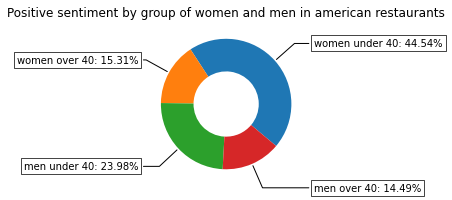

98.31632653061224


In [52]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# percentuali americani
percentuale_women_u40 = "{:.2%}".format(women_u40_american_positive/100)
percentuale_women_o40 = "{:.2%}".format(women_o40_american_positive/100)
percentuale_men_u40 = "{:.2%}".format(men_u40_american_positive/100)
percentuale_men_o40 = "{:.2%}".format(men_o40_american_positive/100)

recipe = ["women under 40: " + "%s" % percentuale_women_u40,
          "women over 40: " + "%s" % percentuale_women_o40,
          "men under 40: " + "%s" % percentuale_men_u40,
          "men over 40: " + "%s" % percentuale_men_o40]

# GRAFICO PER POSITIVI AMERICANI

data = [women_u40_american_positive, women_o40_american_positive, men_u40_american_positive, men_o40_american_positive]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Positive sentiment by group of women and men in american restaurants")

plt.show()

print(women_u40_american_positive + women_o40_american_positive + men_u40_american_positive + men_o40_american_positive)

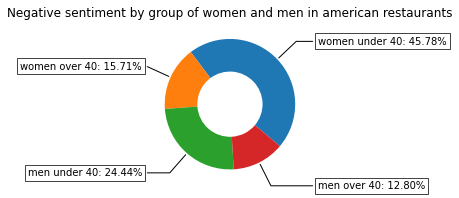

98.73908826382153


In [55]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# percentuali americani
percentuale_women_u40 = "{:.2%}".format(women_u40_american_negative/100)
percentuale_women_o40 = "{:.2%}".format(women_o40_american_negative/100)
percentuale_men_u40 = "{:.2%}".format(men_u40_american_negative/100)
percentuale_men_o40 = "{:.2%}".format(men_o40_american_negative/100)

recipe = ["women under 40: " + "%s" % percentuale_women_u40,
          "women over 40: " + "%s" % percentuale_women_o40,
          "men under 40: " + "%s" % percentuale_men_u40,
          "men over 40: " + "%s" % percentuale_men_o40]

# GRAFICO PER NEGATIVI AMERICANI

data = [women_u40_american_negative, women_o40_american_negative, men_u40_american_negative, men_o40_american_negative]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Negative sentiment by group of women and men in american restaurants")

plt.show()

print(women_u40_american_negative + women_o40_american_negative + men_u40_american_negative + men_o40_american_negative)

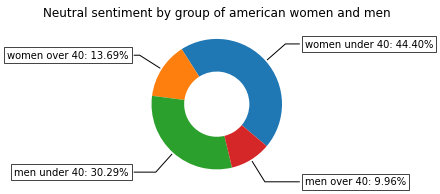

98.34024896265561


In [54]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# percentuali americani
percentuale_women_u40 = "{:.2%}".format(women_u40_american_neutral/100)
percentuale_women_o40 = "{:.2%}".format(women_o40_american_neutral/100)
percentuale_men_u40 = "{:.2%}".format(men_u40_american_neutral/100)
percentuale_men_o40 = "{:.2%}".format(men_o40_american_neutral/100)

recipe = ["women under 40: " + "%s" % percentuale_women_u40,
          "women over 40: " + "%s" % percentuale_women_o40,
          "men under 40: " + "%s" % percentuale_men_u40,
          "men over 40: " + "%s" % percentuale_men_o40]

# GRAFICO PER NEUTRI AMERICANI

data = [women_u40_american_neutral, women_o40_american_neutral, men_u40_american_neutral, men_o40_american_neutral]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Neutral sentiment by group of women and men in american restaurants")

plt.show()

print(women_u40_american_neutral + women_o40_american_neutral + men_u40_american_neutral + men_o40_american_neutral)

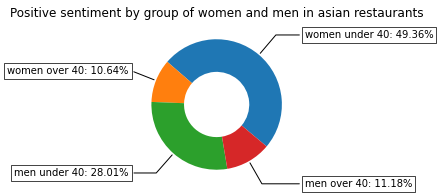

99.1919191919192


In [58]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# percentuali asiatici
percentuale_women_u40 = "{:.2%}".format(women_u40_asian_positive/100)
percentuale_women_o40 = "{:.2%}".format(women_o40_asian_positive/100)
percentuale_men_u40 = "{:.2%}".format(men_u40_asian_positive/100)
percentuale_men_o40 = "{:.2%}".format(men_o40_asian_positive/100)

recipe = ["women under 40: " + "%s" % percentuale_women_u40,
          "women over 40: " + "%s" % percentuale_women_o40,
          "men under 40: " + "%s" % percentuale_men_u40,
          "men over 40: " + "%s" % percentuale_men_o40]

# GRAFICO PER POSITIVI ASIATICI

data = [women_u40_asian_positive, women_o40_asian_positive, men_u40_asian_positive, men_o40_asian_positive]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Positive sentiment by group of women and men in asian restaurants")

plt.show()

print(women_u40_asian_positive + women_o40_asian_positive + men_u40_asian_positive + men_o40_asian_positive)

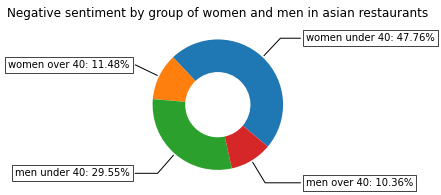

99.15966386554624


In [59]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# percentuali asiatici
percentuale_women_u40 = "{:.2%}".format(women_u40_asian_negative/100)
percentuale_women_o40 = "{:.2%}".format(women_o40_asian_negative/100)
percentuale_men_u40 = "{:.2%}".format(men_u40_asian_negative/100)
percentuale_men_o40 = "{:.2%}".format(men_o40_asian_negative/100)

recipe = ["women under 40: " + "%s" % percentuale_women_u40,
          "women over 40: " + "%s" % percentuale_women_o40,
          "men under 40: " + "%s" % percentuale_men_u40,
          "men over 40: " + "%s" % percentuale_men_o40]

# GRAFICO PER NEGATIVI ASIATICI

data = [women_u40_asian_negative, women_o40_asian_negative, men_u40_asian_negative, men_o40_asian_negative]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Negative sentiment by group of women and men in asian restaurants")

plt.show()

print(women_u40_asian_negative + women_o40_asian_negative + men_u40_asian_negative + men_o40_asian_negative)